# Triangular Arbitrage - Bitfinex

In [26]:
from bitfinex import *
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [27]:
class arbitrage_check:
    
    def __init__(self):
        self.starter = Bitfinex_Pub()
        self.base = ["btc", "eth"]
        self.feed = Bitfinex_Pub()
        self.pairs = self.starter.symbols_v2()
    
    def df_clean(self):
        '''Remove unnecessary data and convert into dataframe'''
        pair_snap = ps.read_json(self.starter.tickers(self.pairs))
        pair_snap.columns = ["SYMBOL","BID", "BID_SIZE", "ASK", "ASK_SIZE", "DAILY_CHANGE", "DAILY_CHANGE_PERC", "LAST_PRICE", "VOLUME", "HIGH", "LOW"]
        pair_snap.drop(inplace=True, columns=["DAILY_CHANGE", "DAILY_CHANGE_PERC", "LAST_PRICE", "VOLUME", "HIGH", "LOW"])
        pair_snap = pair_snap.assign(QUOTE_C=pair_snap['SYMBOL'].str[-3:])
        pair_snap = pair_snap.assign(BASE_C=pair_snap['SYMBOL'].str[1:4])
        
        pair_snap.set_index("SYMBOL", inplace=True)
        return pair_snap
    
    def df_analysis(self):
        data = self.df_clean()

        data_ETH = data[data['QUOTE_C'] == "ETH"]
        data_BTC = data[data['QUOTE_C'] == "BTC"]

        data_cross = pd.merge(data_BTC, data_ETH, on='BASE_C')
        data_cross["CROSS_BID"] = data_cross["BID_x"]/data_cross["ASK_y"]
        data_cross["CROSS_ASK"] = data_cross["ASK_x"]/data_cross["BID_y"]
        data_cross["QUOTE_BID"] = data_BTC.at["tETHBTC", 'BID']
        data_cross["QUOTE_ASK"] = data_BTC.at["tETHBTC", 'ASK']

        data_cross["Buy_QUOTE"] = (((data_cross["QUOTE_BID"]/data_cross["CROSS_ASK"])-1)*100)-((((1+0.002)**3)*100)-100)
        data_cross["Buy_CROSS"] = (((data_cross["CROSS_BID"]/data_cross["QUOTE_ASK"])-1)*100)-((((1+0.002)**3)*100)-100)
        data_cross.sort_values(by=['Buy_QUOTE'])
        data_cross['positive'] = data_cross['Buy_CROSS'] > 0
        #data_cross["FEE"] = (1+0.002)**3
        return data_cross.sort_values("BASE_C")
            

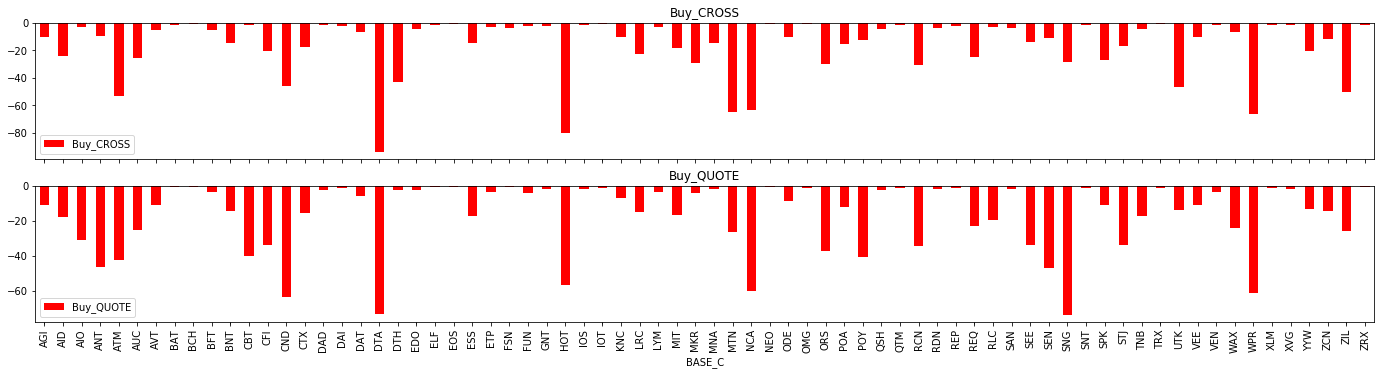

In [28]:
program = arbitrage_check()

data= program.df_analysis()

plots = data.plot.bar(x="BASE_C",y=["Buy_CROSS","Buy_QUOTE"],figsize=(24,5.5),color=data.positive.map({True: 'g', False: 'r'}), subplots=True)


In [29]:
#Descriptive Statistics
data.describe()

,BID_x,BID_SIZE_x,ASK_x,ASK_SIZE_x,BID_y,BID_SIZE_y,ASK_y,ASK_SIZE_y,CROSS_BID,CROSS_ASK,QUOTE_BID,QUOTE_ASK,Buy_QUOTE,Buy_CROSS
count,7.200000e+01,7.200000e+01,7.200000e+01,7.200000e+01,72.000000,7.200000e+01,72.000000,7.200000e+01,72.000000,72.000000,7.200000e+01,7.200000e+01,72.000000,72.000000
mean,2.352759e-03,5.569490e+05,2.672511e-03,1.918708e+05,0.044965,4.984771e+05,0.045830,1.293771e+05,0.049015,0.076845,5.834000e-02,5.835800e-02,-17.222134,-16.611547
std,1.337672e-02,7.715751e+05,1.485532e-02,3.563672e+05,0.250737,6.469945e+05,0.254796,2.353549e+05,0.012047,0.032049,4.192553e-17,4.891312e-17,19.543527,20.642541
min,4.400000e-07,1.320507e+02,5.000000e-07,3.994154e+01,0.000005,2.786226e+02,0.000010,1.843048e+01,0.003697,0.058355,5.834000e-02,5.835800e-02,-73.887622,-94.265345
25%,3.732500e-06,4.794343e+04,5.027500e-06,1.579498e+04,0.000070,3.333336e+04,0.000098,8.009578e+03,0.045257,0.059033,5.834000e-02,5.835800e-02,-25.993316,-23.050380
50%,1.512500e-05,2.428032e+05,1.736000e-05,4.839164e+04,0.000251,1.917807e+05,0.000296,3.872017e+04,0.053062,0.064980,5.834000e-02,5.835800e-02,-10.819424,-9.676471
75%,9.198750e-05,6.748584e+05,1.067300e-04,1.830721e+05,0.001622,7.718352e+05,0.001713,1.192834e+05,0.057490,0.078197,5.834000e-02,5.835800e-02,-1.775708,-2.088523
max,9.941200e-02,3.521112e+06,9.949200e-02,1.774094e+06,1.702200,2.532038e+06,1.707700,1.253457e+06,0.058305,0.218391,5.834000e-02,5.835800e-02,-0.627564,-0.692419


In [30]:
data

,BID_x,BID_SIZE_x,ASK_x,ASK_SIZE_x,QUOTE_C_x,BASE_C,BID_y,BID_SIZE_y,ASK_y,ASK_SIZE_y,QUOTE_C_y,CROSS_BID,CROSS_ASK,QUOTE_BID,QUOTE_ASK,Buy_QUOTE,Buy_CROSS,positive
36,9.500000e-06,5.492900e+05,1.082000e-05,4.135008e+04,BTC,AGI,0.000167,3.616035e+03,0.000180,6.575450e+03,ETH,0.052857,0.064868,0.05834,0.058358,-10.664861,-10.027392,False
24,1.101000e-05,5.294032e+05,1.598000e-05,4.242829e+04,BTC,AID,0.000227,1.578074e+05,0.000247,5.043347e+04,ETH,0.044584,0.070493,0.05834,0.058358,-17.840909,-24.203922,False
29,8.423000e-05,4.799633e+04,1.216100e-04,1.638136e+04,BTC,AIO,0.001448,6.522881e+03,0.001475,5.937857e+02,ETH,0.057109,0.083991,0.05834,0.058358,-31.141053,-2.741513,False
40,2.055400e-04,3.712234e+04,2.200000e-04,6.804108e+03,BTC,ANT,0.002055,5.023160e+02,0.003859,1.975189e+03,ETH,0.053267,0.107040,0.05834,0.058358,-46.098382,-9.325550,False
66,1.520000e-06,1.264434e+06,4.990000e-06,2.895369e+05,BTC,ATM,0.000050,6.997154e+05,0.000055,4.552753e+05,ETH,0.027677,0.099780,0.05834,0.058358,-42.132596,-53.175620,False
55,1.314000e-05,9.430561e+04,1.781000e-05,1.625643e+04,BTC,AUC,0.000231,7.676926e+05,0.000300,1.674287e+05,ETH,0.043803,0.077096,0.05834,0.058358,-24.929537,-25.542220,False
8,9.534000e-05,2.012273e+04,1.059200e-04,1.259081e+04,BTC,AVT,0.001630,7.711624e+02,0.001709,4.943352e+02,ETH,0.055771,0.064978,0.05834,0.058358,-10.816425,-5.034709,False
15,3.742000e-05,8.226592e+04,3.774000e-05,5.058498e+04,BTC,BAT,0.000647,3.821955e+04,0.000650,6.039378e+04,ETH,0.057588,0.058357,0.05834,0.058358,-0.630185,-1.920924,False
4,9.941200e-02,1.320507e+02,9.949200e-02,1.039102e+02,BTC,BCH,1.702200,3.228427e+02,1.707700,3.579016e+02,ETH,0.058214,0.058449,0.05834,0.058358,-0.787801,-0.848002,False
37,8.950000e-06,1.297337e+05,9.180000e-06,2.119394e+05,BTC,BFT,0.000153,1.492364e+06,0.000161,1.151458e+05,ETH,0.055511,0.059914,0.05834,0.058358,-3.228055,-5.480119,False
